<a href="https://colab.research.google.com/github/gentilhimal/Stock-Prediction/blob/main/multivariate_GRU_APPL_Corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict 
#the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock quote 
dataset = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-11-24') 
#Show the data 
data=dataset.drop(['High', 'Low','Open','Adj Close'], axis=1)
data

,Close,Volume
Date,,
2012-01-03,14.686786,302220800.0
2012-01-04,14.765714,260022000.0
2012-01-05,14.929643,271269600.0
2012-01-06,15.085714,318292800.0
2012-01-09,15.061786,394024400.0
...,...,...
2020-11-18,118.029999,76322100.0
2020-11-19,118.639999,74113000.0
2020-11-20,117.339996,73604300.0


In [ ]:
y_data=dataset.filter(['Close']).values
y_test=y_data
y_data

array([[ 14.6867857 ],
       [ 14.76571369],
       [ 14.92964268],
       ...,
       [117.33999634],
       [113.84999847],
       [115.16999817]])

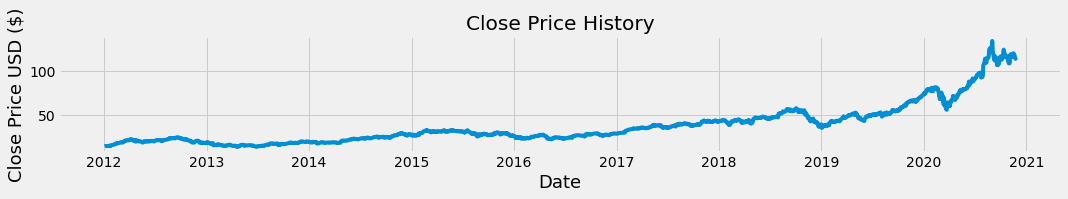

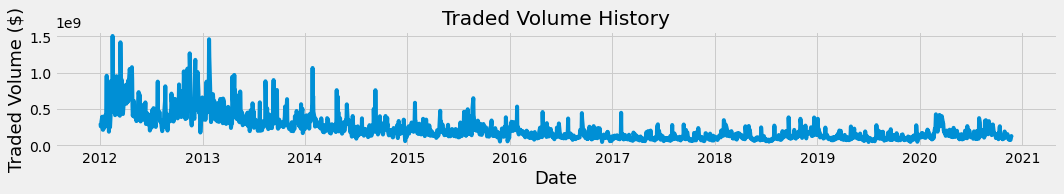

In [ ]:
#Visualize the closing price history

plt.figure(figsize=(16,2))
plt.title('Close Price History')
plt.plot(dataset['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

plt.figure(figsize=(16,2))
plt.title('Traded Volume History')
plt.plot(dataset['Volume'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Traded Volume ($)',fontsize=18)
plt.show()

In [ ]:
# Converting the dataframe to a numpy array
dataset = data.values

#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 
training_data_len

1792

In [ ]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
y_data=scaler.fit_transform(y_data)
len(y_data)

2240

In [ ]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len, : ]
print(len(train_data))
#Split the data into x_train and y_train data sets
x_train=train_data
y_train_data=[]
for i in range(60,len(train_data)):
     y_train_data.append(y_data[i,0])
y_train_data

1792


[0.06515055661523342,
 0.062088042929699744,
 0.06775563656793951,
 0.0709310214519843,
 0.06944283492600703,
 0.07222614508465441,
 0.07298359569819068,
 0.0706696330137738,
 0.07000425610876296,
 0.06898538532934267,
 0.06377524128776726,
 0.056319460106678265,
 0.06510302856031572,
 0.06469905595735218,
 0.058490838626342134,
 0.05419559377809535,
 0.05381536933875389,
 0.050423141670106336,
 0.065192135731368,
 0.06450894373768143,
 0.0631128309202296,
 0.05746306823450234,
 0.056913544929312554,
 0.05805715305713663,
 0.05682145535695035,
 0.0518994461823542,
 0.05315594137252613,
 0.05276978385823833,
 0.0530668183376371,
 0.05346485786565433,
 0.05233313175155968,
 0.04981122589495954,
 0.04831115735525285,
 0.04620512197918242,
 0.04146430954800073,
 0.041541534705323596,
 0.05072017614950511,
 0.04943993279571107,
 0.0534767557432205,
 0.05192024367233988,
 0.051020193030213795,
 0.053984684068438926,
 0.056034291777172174,
 0.05560655514674978,
 0.05063403551592599,
 0.051614

In [ ]:
x_final=np.empty((1,2))
for i in range(60,len(train_data)):
    x_final=np.concatenate((x_final,x_train[i-60:i]),axis=0)
x_final = np.delete(x_final, (0), axis=0)
x_final.shape
print(x_final)

[[0.0061488  0.17579087]
 [0.00680526 0.14690088]
 [0.00816869 0.15460117]
 ...
 [0.23932798 0.02990815]
 [0.23785166 0.03047419]
 [0.23914085 0.02868187]]


In [ ]:
x_train=x_final

In [ ]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train_data)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (1732,60,x_train.shape[1]))

In [ ]:
x_train[0]

array([[0.0061488 , 0.17579087],
       [0.00680526, 0.14690088],
       [0.00816869, 0.15460117],
       [0.00946678, 0.18679402],
       [0.00926776, 0.23864112],
       [0.00971629, 0.14565104],
       [0.00951133, 0.11613613],
       [0.00916676, 0.11442624],
       [0.00869743, 0.12362365],
       [0.01014998, 0.13517696],
       [0.01145994, 0.15838135],
       [0.01105596, 0.14807595],
       [0.00884298, 0.25229922],
       [0.01095496, 0.17842089],
       [0.00887566, 0.34380751],
       [0.01667305, 0.62496303],
       [0.01607006, 0.19069113],
       [0.01685722, 0.17407139],
       [0.01855928, 0.22858876],
       [0.01959001, 0.23703857],
       [0.01950387, 0.15376347],
       [0.01918604, 0.09676943],
       [0.02054056, 0.16509634],
       [0.02181487, 0.13963765],
       [0.02325851, 0.18537742],
       [0.0255903 , 0.24813374],
       [0.03048855, 0.5742335 ],
       [0.03056281, 0.40108525],
       [0.03328967, 0.32298011],
       [0.03532738, 0.28408185],
       [0.

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(GRU(units=50, return_sequences=True,input_shape=(x_train.shape[1],2)))
model.add(GRU(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
history=model.fit(x_train, y_train, batch_size=1, epochs=4)

Epoch 1/4
1732/1732 [==============================] - 38s 21ms/step - loss: 5.6698e-04
Epoch 2/4
1732/1732 [==============================] - 36s 21ms/step - loss: 1.2973e-04
Epoch 3/4
1732/1732 [==============================] - 36s 21ms/step - loss: 8.3275e-05
Epoch 4/4
1732/1732 [==============================] - 37s 21ms/step - loss: 8.7261e-05


Text(0, 0.5, 'MSE')

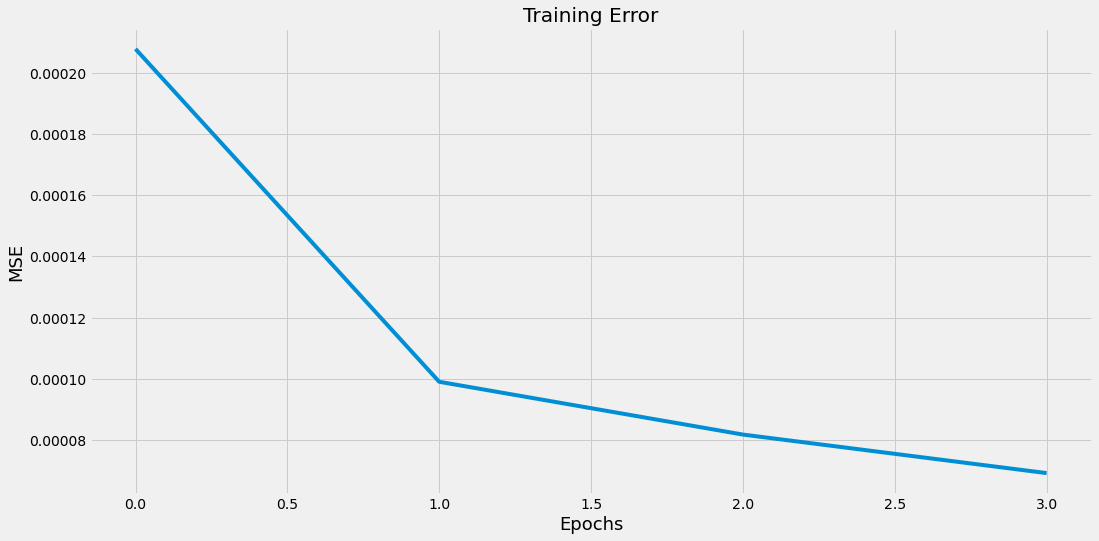

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='train')
plt.title('Training Error')
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('MSE', fontsize=18)

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test =  test_data #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
x_final_test=np.empty((1,2))
y_test =  y_test[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_final_test=np.concatenate((x_final_test,test_data[i-60:i]),axis=0)
x_final_test = np.delete(x_final_test, (0), axis=0)
x_test=x_final_test
print(len(y_test))
print(len(x_test))

448
26880


In [ ]:
#Convert x_test to a numpy array 
y_test = np.array(y_test)
y_test

array([[ 42.73249817],
       [ 43.00749969],
       [ 42.76499939],
       [ 43.24250031],
       [ 43.55749893],
       [ 43.58250046],
       [ 43.71749878],
       [ 43.28749847],
       [ 43.74250031],
       [ 43.96250153],
       [ 43.88249969],
       [ 43.63000107],
       [ 43.125     ],
       [ 43.22750092],
       [ 44.72499847],
       [ 45.22750092],
       [ 45.42750168],
       [ 45.93249893],
       [ 46.52999878],
       [ 47.00500107],
       [ 46.63249969],
       [ 47.04000092],
       [ 48.77249908],
       [ 47.76250076],
       [ 47.18500137],
       [ 46.69749832],
       [ 47.11750031],
       [ 47.18000031],
       [ 47.48749924],
       [ 47.81000137],
       [ 48.50500107],
       [ 48.83750153],
       [ 48.92250061],
       [ 49.25      ],
       [ 50.02500153],
       [ 49.875     ],
       [ 50.15499878],
       [ 49.73749924],
       [ 49.71749878],
       [ 49.80749893],
       [ 49.8125    ],
       [ 50.78250122],
       [ 50.96500015],
       [ 51

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (448,60,x_test.shape[1]))
print(x_test)
print(y_test[62])

[[[0.27045518 0.08369655]
  [0.25199094 0.15462253]
  [0.25157508 0.0541181 ]
  ...
  [0.23785166 0.03047419]
  [0.23914085 0.02868187]
  [0.2383507  0.0363252 ]]

 [[0.25199094 0.15462253]
  [0.25157508 0.0541181 ]
  [0.24223899 0.03357906]
  ...
  [0.23914085 0.02868187]
  [0.2383507  0.0363252 ]
  [0.23941114 0.02084191]]

 [[0.25157508 0.0541181 ]
  [0.24223899 0.03357906]
  [0.24708378 0.0921124 ]
  ...
  [0.2383507  0.0363252 ]
  [0.23941114 0.02084191]
  [0.24169839 0.04039894]]

 ...

 [[0.92373118 0.07537928]
  [0.92204695 0.09734013]
  [0.9572495  0.12340532]
  ...
  [0.87698838 0.0197327 ]
  [0.86567696 0.02113692]
  [0.87075047 0.01962453]]

 [[0.92204695 0.09734013]
  [0.9572495  0.12340532]
  [1.         0.07326908]
  ...
  [0.86567696 0.02113692]
  [0.87075047 0.01962453]
  [0.85993806 0.01927626]]

 [[0.9572495  0.12340532]
  [1.         0.07326908]
  [0.97687814 0.1058903 ]
  ...
  [0.87075047 0.01962453]
  [0.85993806 0.01927626]
  [0.83091098 0.05648859]]]
[47.25]


In [ ]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling
predictions.shape

(448, 1)

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

2.7529413173976414

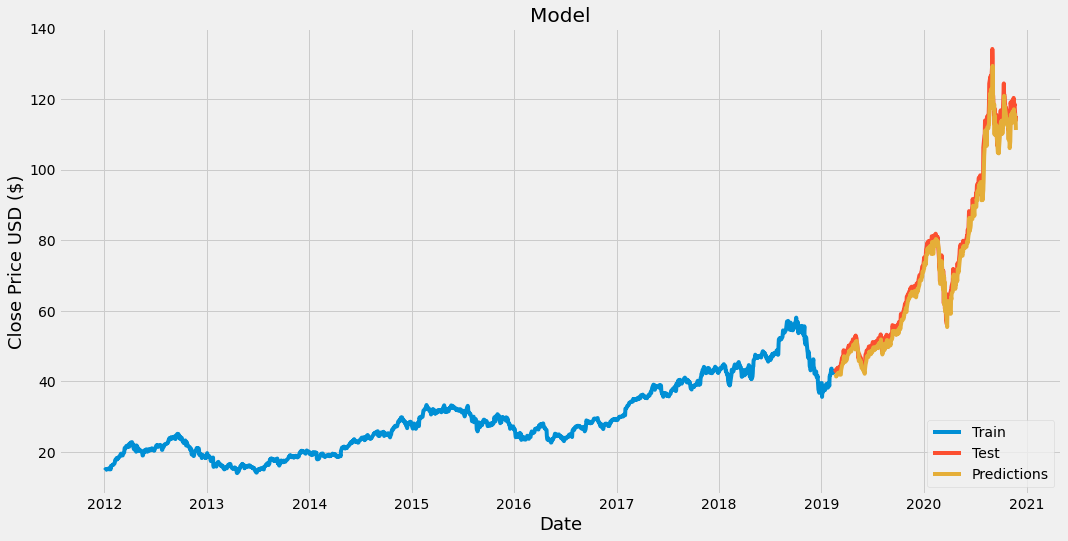

                 Close  predictions
Date                               
2019-02-19   42.732498    41.195084
2019-02-20   43.007500    41.290775
2019-02-21   42.764999    41.534763
2019-02-22   43.242500    41.351215
2019-02-25   43.557499    41.746380
...                ...          ...
2020-11-18  118.029999   116.119423
2020-11-19  118.639999   115.027412
2020-11-20  117.339996   115.683174
2020-11-23  113.849998   114.302788
2020-11-24  115.169998   111.204651

[448 rows x 2 columns]


In [ ]:
# #Plot/Create the data for the graph
train = data[:training_data_len]
test = data[training_data_len:]
train=train['Close']
test=test['Close']
valid=pd.DataFrame(test)
valid['predictions']=predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train)
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()
print(valid)

In [ ]:
#Show the valid and predicted prices
valid

,Close,predictions
Date,,
2019-02-19,42.732498,41.195084
2019-02-20,43.007500,41.290775
2019-02-21,42.764999,41.534763
2019-02-22,43.242500,41.351215
2019-02-25,43.557499,41.746380
...,...,...
2020-11-18,118.029999,116.119423
2020-11-19,118.639999,115.027412
2020-11-20,117.339996,115.683174


In [ ]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-11-24')
#Create a new dataframe
new_df = apple_quote.drop(['High', 'Low','Open','Adj Close'], axis=1)
x_final_test=np.empty((1,2))
x_final_test=np.concatenate((x_final_test,new_df[-60:]),axis=0)
x_final_test = np.delete(x_final_test, (0), axis=0)
test_data=x_final_test
#Scale the data to be values between 0 and 1
test_data_scaled = scaler.transform(test_data)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test=test_data_scaled
#Reshape the data
X_test = np.reshape(X_test, (1,60,X_test.shape[1]))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(X_test)
pred_price

[[[1.00000000e+00 1.26812713e+06]
  [9.76878141e-01 1.66443348e+06]
  [8.89381022e-01 2.14251223e+06]
  [8.90046415e-01 2.76636689e+06]
  [8.22344255e-01 1.92432662e+06]
  [8.59771742e-01 1.47165282e+06]
  [8.27916777e-01 1.51601603e+06]
  [8.15524138e-01 1.50425465e+06]
  [8.43470000e-01 1.16565899e+06]
  [8.44967102e-01 1.53570788e+06]
  [8.16605354e-01 1.28649904e+06]
  [8.01717524e-01 1.48055640e+06]
  [7.72607256e-01 2.38791428e+06]
  [7.99555092e-01 1.62779447e+06]
  [8.13943846e-01 1.52251178e+06]
  [7.74936131e-01 1.25356036e+06]
  [7.84085059e-01 1.39515769e+06]
  [8.17852949e-01 1.24742807e+06]
  [8.40143099e-01 1.14505142e+06]
  [8.32907096e-01 8.26583430e+05]
  [8.47212723e-01 1.18666080e+06]
  [8.55363626e-01 9.65798710e+05]
  [8.24007674e-01 1.20360132e+06]
  [8.52951625e-01 8.83652862e+05]
  [8.25172143e-01 1.34321582e+06]
  [8.41141189e-01 8.05514251e+05]
  [8.40226289e-01 6.94298058e+05]
  [8.56860728e-01 8.35937807e+05]
  [9.18657669e-01 1.99801885e+06]
  [8.91210821e

array([[57.27341]], dtype=float32)

In [ ]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-11-25', end='2020-11-25')
print(apple_quote2['Close'])

Date
2020-11-25    116.029999
Name: Close, dtype: float64


In [ ]:
X_test.shape[0]

1

In [ ]:
X_test.shape[1]

60